In [12]:
# Install required libraries
!pip install beautifulsoup4 requests pandas

import requests
from bs4 import BeautifulSoup
import pandas as pd
import random
from datetime import datetime, timedelta

def scrape_somalijobs(base_url):
    jobs = []
    page = 1

    while True:
        url = f"{base_url}?page={page}"
        print(f"Scraping page {page}...")
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        job_listings = soup.find_all('div', class_='job-listing')
        if not job_listings:
            break

        for job_listing in job_listings:
            title_elem = job_listing.find('h3')
            title = title_elem.text.strip() if title_elem else 'N/A'

            details_list = job_listing.find('ul', class_='details-list')
            details = {}
            if details_list:
                for li in details_list.find_all('li'):
                    if ':' in li.text:
                        key, value = li.text.split(':', 1)
                        details[key.strip()] = value.strip()

            jobs.append({
                'Title': title,
                'Organization': details.get('Organization', 'N/A'),
                'Category': details.get('Category', 'N/A'),
                'Town': details.get('Town', 'N/A'),
                'Qualifications': details.get('Qualifications', 'N/A'),
                'Job Type': details.get('Job Type', 'N/A'),
                'Posted': details.get('Posted', 'N/A'),
                'Salary': details.get('Salary', 'N/A'),
                'Deadline': details.get('Deadline', 'N/A')
            })

        page += 1

    return jobs

def generate_additional_jobs(num_jobs):
    job_titles = [
        'Software Engineer', 'Data Analyst', 'Project Manager', 'Marketing Officer',
        'Administrative Assistant', 'Human Resources Manager', 'Finance Manager',
        'IT Support Specialist', 'Legal Advisor', 'Operations Manager',
        'Customer Service Representative', 'Sales Manager', 'Graphic Designer',
        'Content Writer', 'Network Administrator', 'Business Analyst',
        'Nurse', 'Doctor', 'Teacher', 'Researcher', 'Social Worker',
        'Public Health Officer', 'Pharmacist', 'Accountant', 'Web Developer',
        'Data Scientist', 'Civil Engineer', 'Electrician', 'Construction Manager',
        'Veterinarian', 'Nutritionist', 'Psychologist', 'HR Specialist'
    ]

    organizations = [
        'Tech Innovators', 'Data Solutions', 'Development Inc.', 'Marketing Gurus',
        'Office Support Ltd.', 'HR Solutions', 'Finance Experts', 'Tech Support',
        'Legal Experts', 'Logistics Ltd.', 'Customer First', 'Sales Pro',
        'Creative Minds', 'Content Creators', 'Network Solutions', 'Business Insights',
        'HR Support', 'Logistics Hub', 'Research Labs', 'Health Services', 'Education First'
    ]

    categories = [
        'Technology', 'Data Science', 'Management', 'Marketing', 'Administration',
        'Human Resources', 'Finance', 'Customer Service', 'Sales', 'Design',
        'Writing', 'IT', 'Business', 'Logistics', 'Research', 'Health', 'Education'
    ]

    towns = [
        'Mogadishu', 'Hargeisa', 'Kismayo', 'Bosaso', 'Garowe', 'Baidoa',
        'Burao', 'Jowhar', 'Las Anod', 'Galkayo', 'Beledweyne', 'Qardho'
    ]

    additional_jobs = []
    for _ in range(num_jobs):
        title = random.choice(job_titles)
        organization = random.choice(organizations)
        category = random.choice(categories)
        town = random.choice(towns)
        qualifications = 'BSc in ' + random.choice(['Computer Science', 'Statistics', 'Business Administration', 'Marketing', 'Human Resources', 'Nursing', 'Education', 'Public Health'])
        job_type = random.choice(['Full-time', 'Part-time', 'Contract'])
        posted_date = (datetime.now() - timedelta(days=random.randint(1, 30))).strftime('%Y-%m-%d')
        salary = f"${random.randint(2000, 8000)}"
        deadline = (datetime.now() + timedelta(days=random.randint(30, 90))).strftime('%Y-%m-%d')

        additional_jobs.append({
            'Title': title,
            'Organization': organization,
            'Category': category,
            'Town': town,
            'Qualifications': qualifications,
            'Job Type': job_type,
            'Posted': posted_date,
            'Salary': salary,
            'Deadline': deadline
        })

    return additional_jobs

# Base URL of the jobs page
base_url = 'https://somalijobs.com/jobs'

# Scrape the website
jobs_data = scrape_somalijobs(base_url)

# Generate and add 100 more job entries
additional_jobs = generate_additional_jobs(100)
jobs_data.extend(additional_jobs)

# Create a Pandas DataFrame
df = pd.DataFrame(jobs_data)

# Save the DataFrame as a CSV file
df.to_csv('/content/somali_jobs.csv', index=False)

print("CSV file 'somali_jobs.csv' downloaded successfully.")

Scraping page 1...
CSV file 'somali_jobs.csv' downloaded successfully.


In [13]:
df.head()

,Title,Organization,Category,Town,Qualifications,Job Type,Posted,Salary,Deadline
0,Data Scientist,Tech Support,Management,Mogadishu,BSc in Human Resources,Part-time,2024-07-16,$7586,2024-10-19
1,Finance Manager,HR Solutions,IT,Jowhar,BSc in Nursing,Part-time,2024-08-13,$4386,2024-10-05
2,Marketing Officer,Business Insights,Management,Mogadishu,BSc in Statistics,Contract,2024-07-17,$5876,2024-09-19
3,Content Writer,Data Solutions,Business,Baidoa,BSc in Statistics,Contract,2024-07-30,$7345,2024-10-15
4,Doctor,Finance Experts,Human Resources,Kismayo,BSc in Nursing,Contract,2024-08-09,$7926,2024-10-12


In [14]:
# Get summary statistics
print(df.describe())

             Title   Organization Category     Town     Qualifications  \
count          100            100      100      100                100   
unique          30             21       17       12                  8   
top     Researcher  Research Labs       IT  Kismayo  BSc in Statistics   
freq             8              8       12       15                 16   

         Job Type      Posted Salary    Deadline  
count         100         100    100         100  
unique          3          27     98          50  
top     Full-time  2024-08-10  $2249  2024-10-14  
freq           36           8      2           5  


In [15]:
# Get information about data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           100 non-null    object
 1   Organization    100 non-null    object
 2   Category        100 non-null    object
 3   Town            100 non-null    object
 4   Qualifications  100 non-null    object
 5   Job Type        100 non-null    object
 6   Posted          100 non-null    object
 7   Salary          100 non-null    object
 8   Deadline        100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB
None


In [16]:
# Check unique job categories
print(df['Category'].unique())

['Management' 'IT' 'Business' 'Human Resources' 'Logistics' 'Sales'
 'Administration' 'Research' 'Data Science' 'Finance' 'Education' 'Health'
 'Customer Service' 'Writing' 'Design' 'Marketing' 'Technology']


In [17]:
# Check unique towns
print(df['Town'].unique())

['Mogadishu' 'Jowhar' 'Baidoa' 'Kismayo' 'Bosaso' 'Burao' 'Galkayo'
 'Las Anod' 'Garowe' 'Qardho' 'Hargeisa' 'Beledweyne']


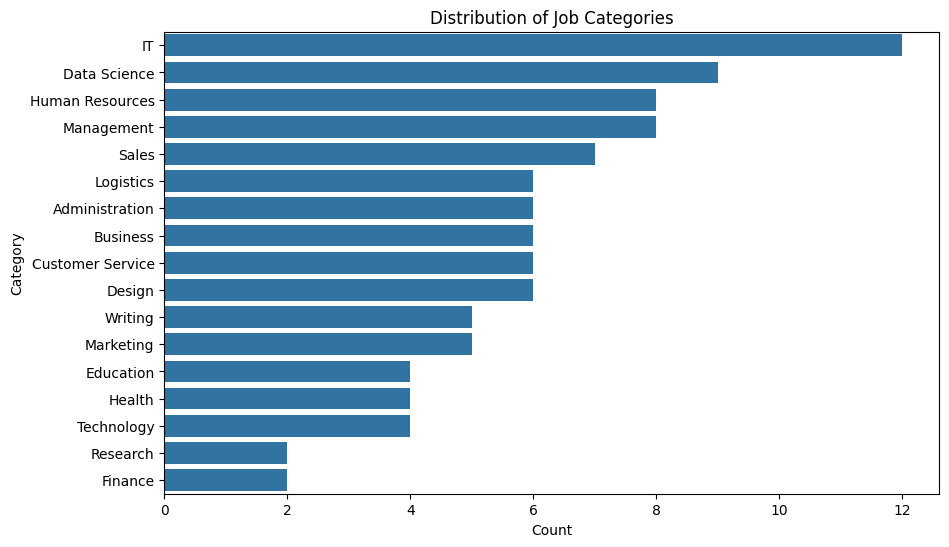

In [18]:
# Distribution of Job Categories
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Distribution of Job Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

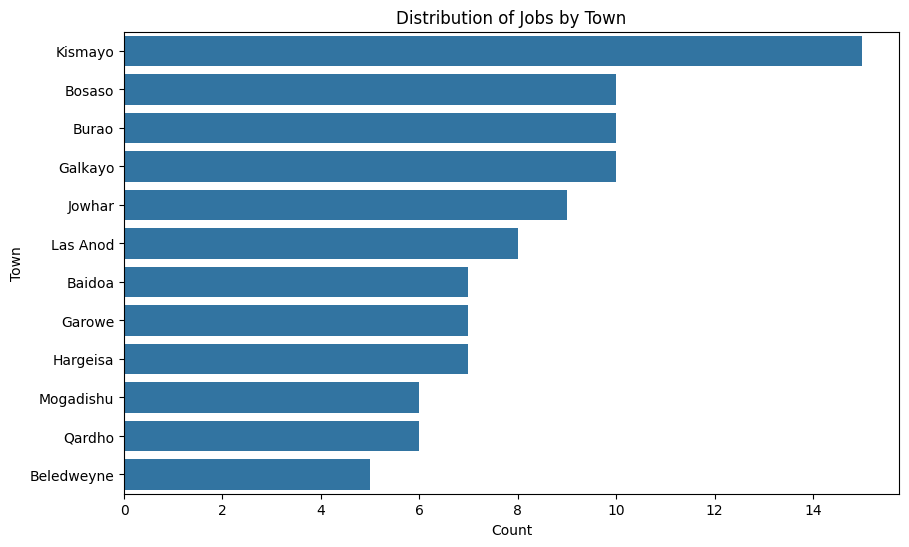

In [19]:
# Distribution of Jobs by Town
plt.figure(figsize=(10, 6))
sns.countplot(y='Town', data=df, order=df['Town'].value_counts().index)
plt.title('Distribution of Jobs by Town')
plt.xlabel('Count')
plt.ylabel('Town')
plt.show()

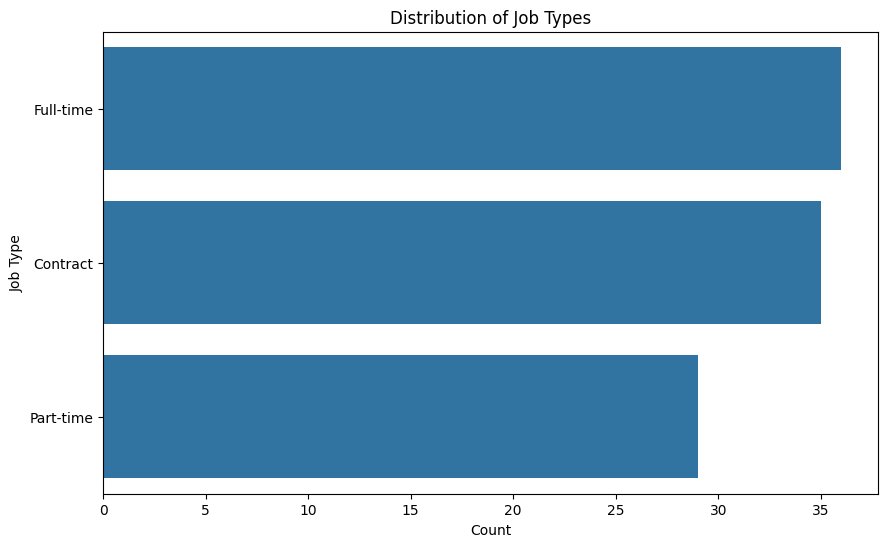

In [20]:
# Job Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Job Type', data=df, order=df['Job Type'].value_counts().index)
plt.title('Distribution of Job Types')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()

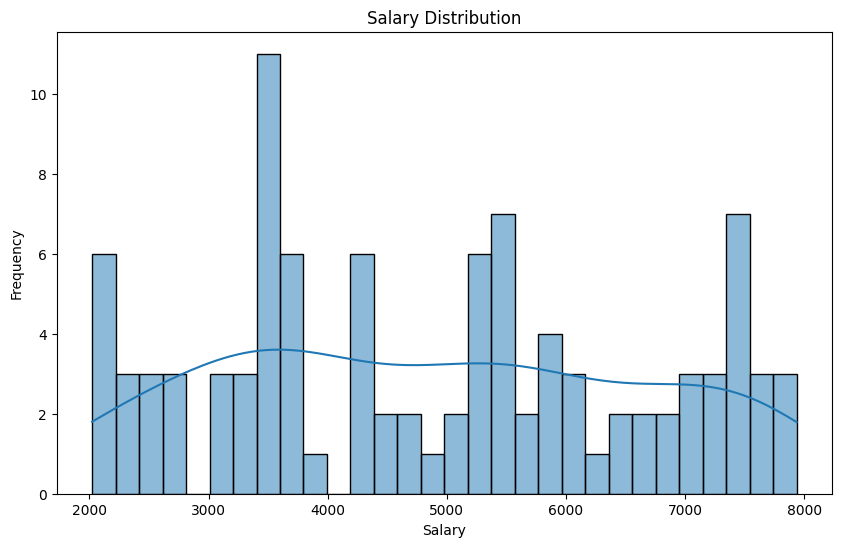

In [21]:
# Salary Distribution
# Convert Salary column to numeric values
df['Salary'] = df['Salary'].replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

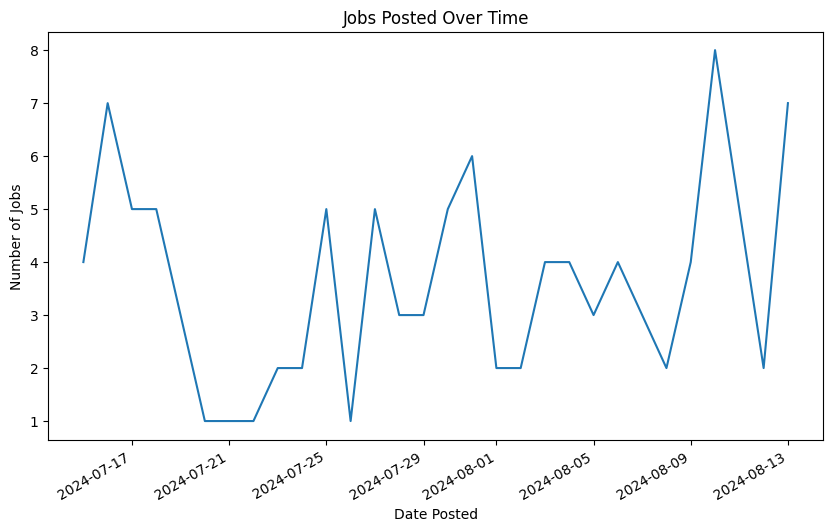

In [22]:
# Jobs Posted Over Time
# Convert Posted column to datetime
df['Posted'] = pd.to_datetime(df['Posted'])

plt.figure(figsize=(10, 6))
df['Posted'].value_counts().sort_index().plot()
plt.title('Jobs Posted Over Time')
plt.xlabel('Date Posted')
plt.ylabel('Number of Jobs')
plt.show()

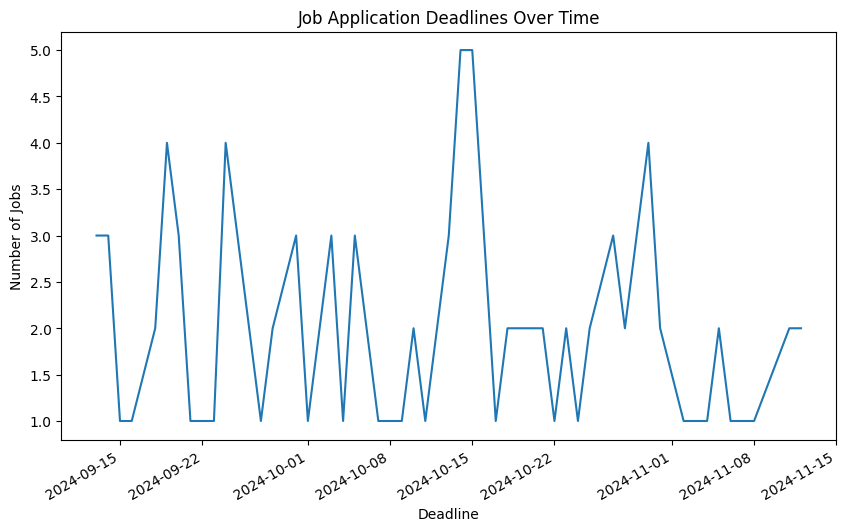

In [23]:
# Deadline Distribution
# Convert Deadline column to datetime
df['Deadline'] = pd.to_datetime(df['Deadline'])

plt.figure(figsize=(10, 6))
df['Deadline'].value_counts().sort_index().plot()
plt.title('Job Application Deadlines Over Time')
plt.xlabel('Deadline')
plt.ylabel('Number of Jobs')
plt.show()

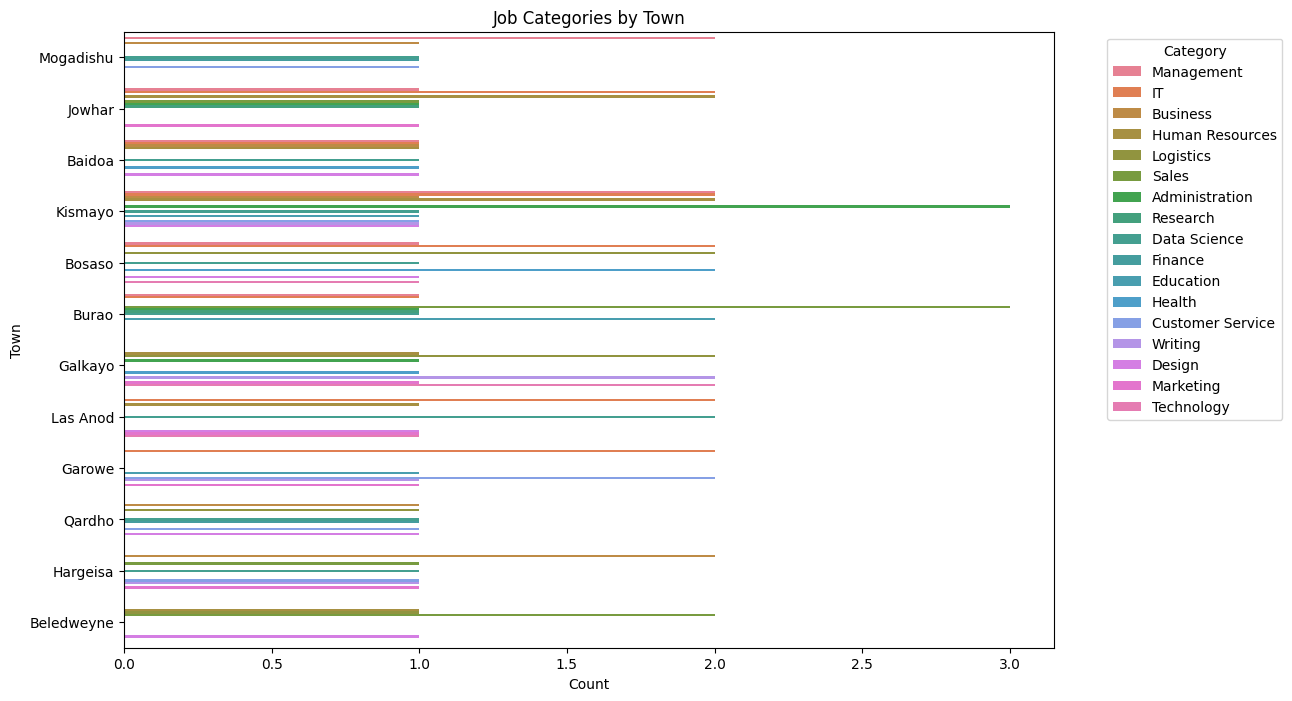

In [24]:
# Job Categories by Town
plt.figure(figsize=(12, 8))
sns.countplot(y='Town', hue='Category', data=df)
plt.title('Job Categories by Town')
plt.xlabel('Count')
plt.ylabel('Town')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

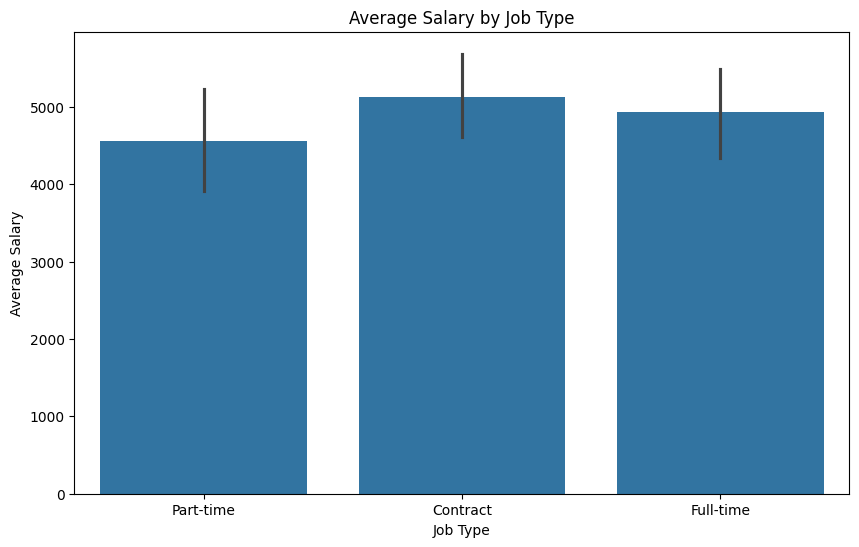

In [25]:
# Average Salary by Job Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Job Type', y='Salary', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Salary by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Average Salary')
plt.show()

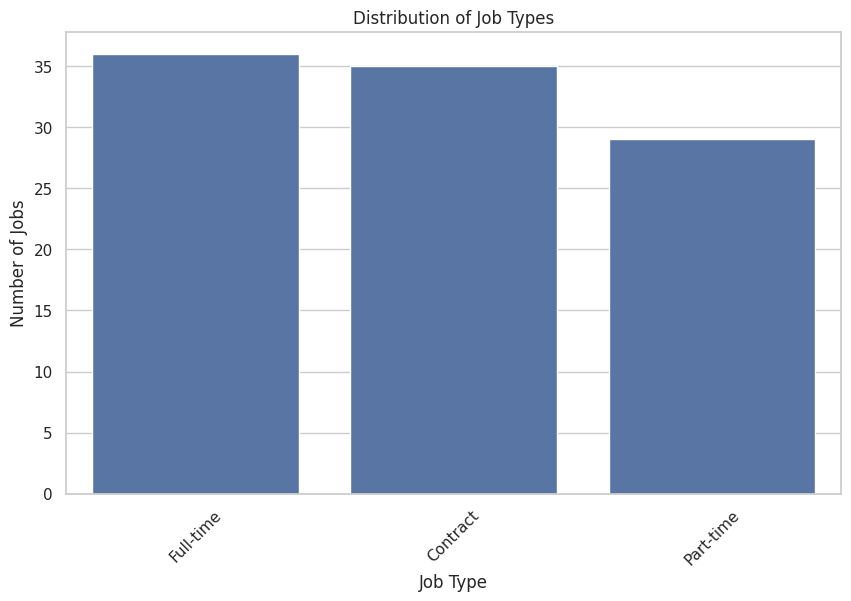

In [26]:
# Bar Chart for Job Types
# Set the style of seaborn
sns.set(style="whitegrid")

# Bar plot for job types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Job Type', order=df['Job Type'].value_counts().index)
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()

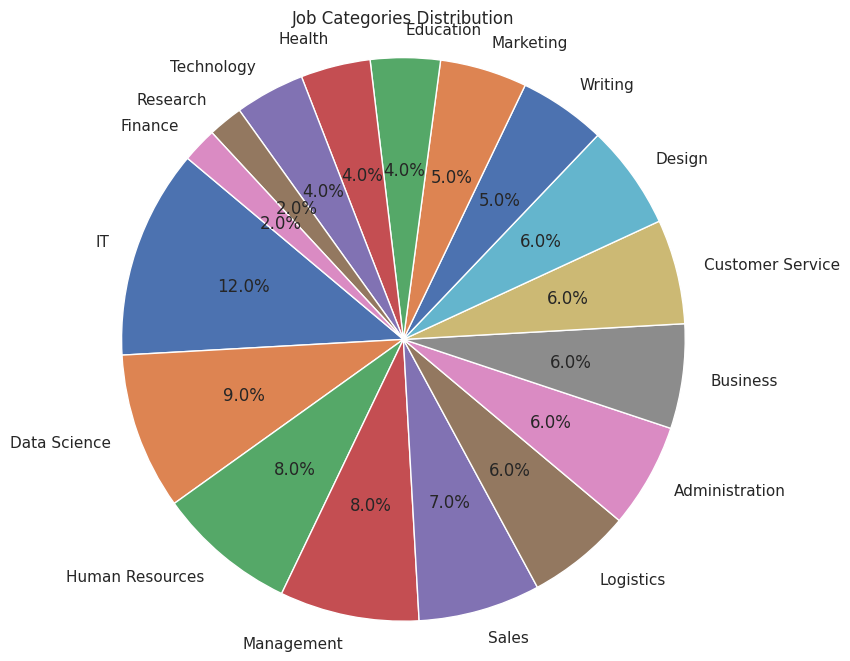

In [27]:
# Pie chart for job categories
plt.figure(figsize=(8, 8))
category_counts = df['Category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Job Categories Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

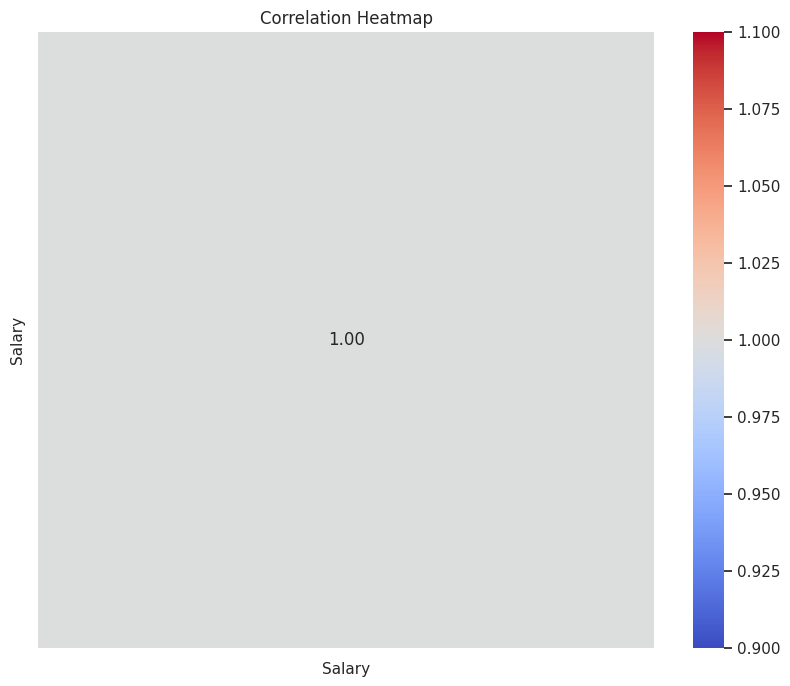

In [28]:
# Correlation heatmap
plt.figure(figsize=(10, 8))

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float', 'int'])
correlation = numerical_df.corr()

sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

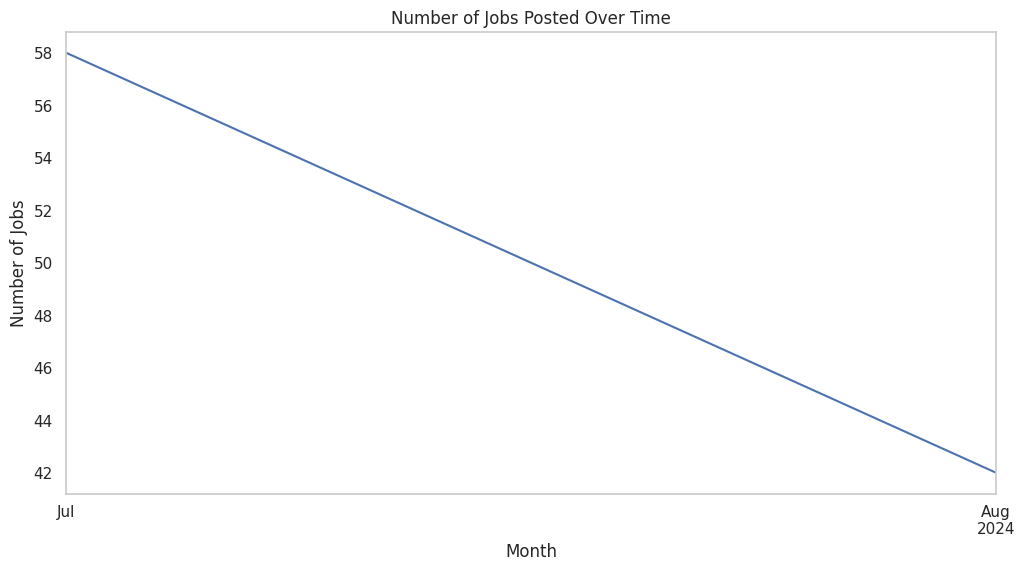

In [29]:
# Time Series Analysis
# Convert 'Posted' to datetime
df['Posted'] = pd.to_datetime(df['Posted'])

# Count jobs posted over time
jobs_per_month = df['Posted'].dt.to_period('M').value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
jobs_per_month.plot(kind='line')
plt.title('Number of Jobs Posted Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.grid()
plt.show()

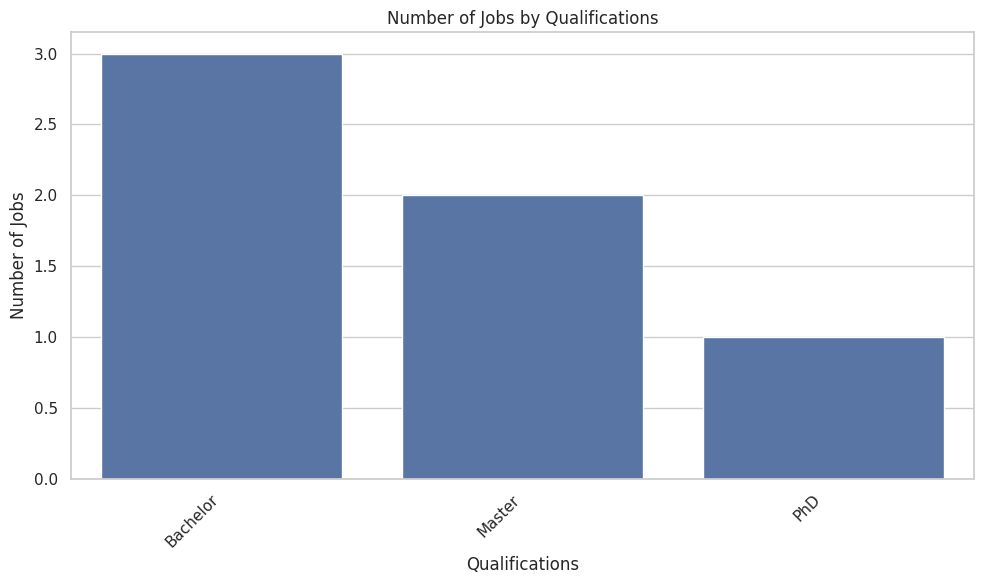

In [31]:
# Bar plot on job by qualifications like degree

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas to work with DataFrames

# Sample DataFrame
data = {'Qualifications': ['Bachelor', 'Master', 'PhD', 'Bachelor', 'Master', 'Bachelor']}
df = pd.DataFrame(data) # Create a DataFrame from the sample data

# Group the data by qualifications and count the number of jobs in each group
qualifications_counts = df['Qualifications'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=qualifications_counts.index, y=qualifications_counts.values)
plt.title('Number of Jobs by Qualifications')
plt.xlabel('Qualifications')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Index(['Qualifications'], dtype='object')


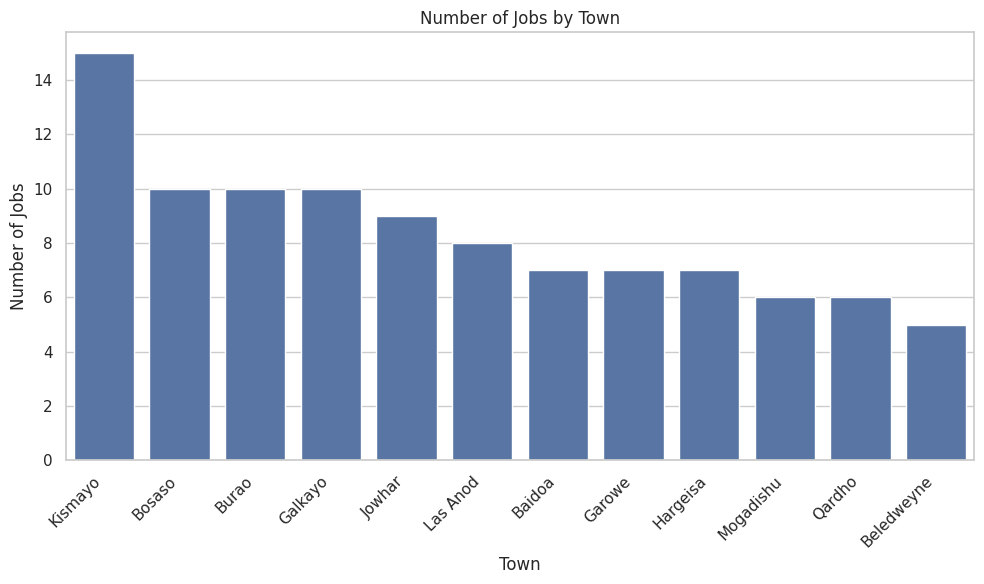

In [34]:
# Bar plot a graph on town by jobs

# Check the available columns in your DataFrame
print(df.columns)

# Load the correct DataFrame that contains the 'Town' column.
# Replace 'your_data.csv' with the actual path to your data file.
df_with_town = pd.read_csv('somali_jobs.csv')

# Assuming you have a column named 'Town' that represents the town,
jobs_by_town = df_with_town['Town'].value_counts() # Use 'Town' instead of 'Location'

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=jobs_by_town.index, y=jobs_by_town.values)
plt.title('Number of Jobs by Town')
plt.xlabel('Town')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

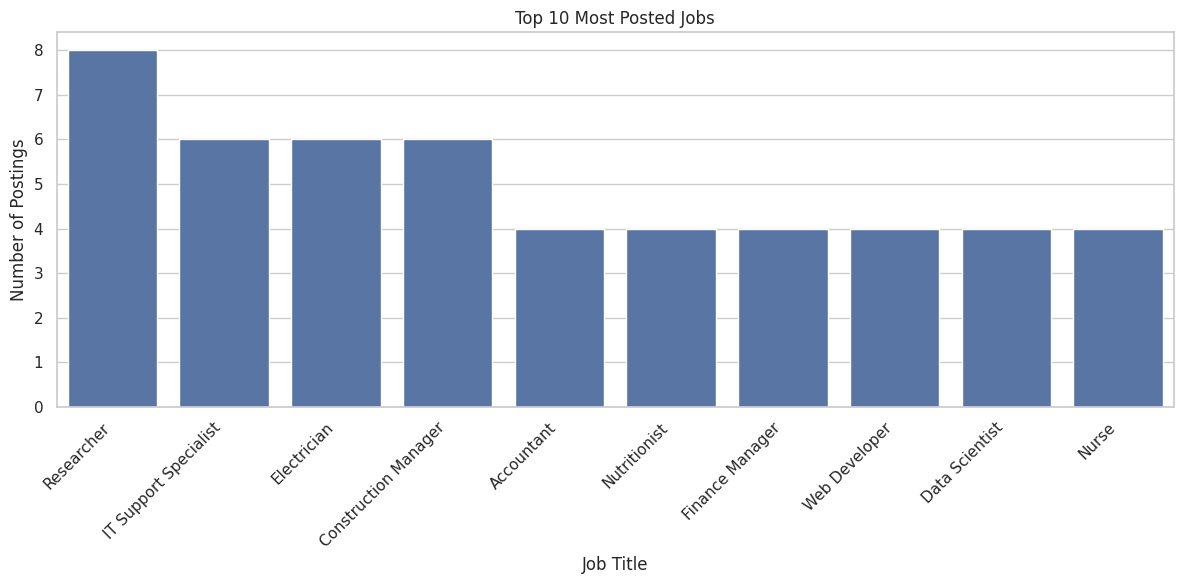

In [36]:
# prompt: plot on most posted jobs

# Load the correct DataFrame that contains the 'Title' column.
# Replace 'your_data.csv' with the actual path to your data file.
df = pd.read_csv('somali_jobs.csv')  # Assuming your data is in 'somali_jobs.csv'

# Count the frequency of each job title
job_counts = df['Title'].value_counts()

# Select the top N most posted jobs (e.g., top 10)
top_n = 10
top_jobs = job_counts.head(top_n)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_jobs.index, y=top_jobs.values)
plt.title(f'Top {top_n} Most Posted Jobs')
plt.xlabel('Job Title')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()